---
license: CC-BY-4.0
github: https://github.com/jamasole/Curso-TalentQ-Jupyterlab
subject: Curso
venue: Quantum Spain
authors:
  - name: Javier Mas
    email: javier.mas@usc.es
    corresponding: true
    orcid: 0000-0001-7008-2126
    affiliations:
      - IGFAE-USC
  - name: David Castaño
    email: javier.mas@usc.es
    corresponding: true
    orcid: 0000-0001-7008-2126
    affiliations:
      - UMA
math:   
    '\i': '{i}'
    '\bes': '\begin{equation*}'
    '\ees': '\end{equation*}'
    '\O': '{\mathcal O}'
    '\Lin': '\rm L'
    '\Hil': '{\mathcal H}'
    '\bra': '{\langle #1|}'
    '\ket': '{|#1\rangle}'
    '\braket': '{\langle #1|#2\rangle}'
    '\ketbra': '{| #1\rangle  \langle #2|}'
    '\tr': '{\rm tr}'
    '\R': '{\mathbb R}' 
    '\C': '{\mathbb C}'
    '\V': '{V}'
---

```{figure} ../thumbnails/myThumbnail.png
:align: center
```

# Números Complejos

In [2]:
%run ../macro_tQ.py
import sys

sys.path.append('../')

import macro_tQ as tQ
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

## Introducción

La mecánica cuántica guarda una relación muy estrecha con los números complejos. 

Recuerda que el *cuadrado* de un número real, $a\in {\mathbb R}$ <u>siempre  es positivo</u>



$$ a^2 >0 $$



por ejemplo $~~2^2 =  4~~$ pero también $~~(-2)^2 = 4~~$.


Por eso, la raíz cuadrada de un número real <u>*sólo* existe si dicho número es positivo</u>.  



Por ejemplo $\sqrt{4}=\pm 2$, mientras que 

$$\sqrt{-4}= \, ?$$


**Pregunta**: $~~$ ¿cómo podríamos definir la <u>raíz cuadrada de un número real negativo</u>? 



**Respuesta**:  es necesario <u>ampliar el conjunto de los números reales</u>. 


:::{card}

**Definición:** *número* $i$

^^^
 
Se postula la existencia de un <i>nuevo número</i>, $~i$, que es la solución única de la ecuación 

$$
i^2 = -1
$$
:::

Equivalentemente podíamos haber requerido que  $i = \sqrt{-1}$. 


Con esto podemos ahora encontrar la raíz de cualquier número negativo. Por ejemplo, $-4$

$$
(2i)(2i) = 4 i^2 = - 4
$$

y $2i$ será la raíz buscada.

Con el número $i$ se opera igual que con los números reales



$$ i + i = 2i $$

$$ i - i = 0 $$

$$ i + 2i = 3 i$$

$$i^3  = i*i*i = i^2 * i = -i$$

$$\frac{i}{i} = 1$$

Observar que el *inverso multiplicativo*  $1/i$ también es $-i$

\begin{eqnarray}
\frac{i}{i}  &=&   1 \nonumber\\
i (-i) &=& - i^2  =  1
\end{eqnarray}

por tanto hay una identificación importante

$$ i^{-1} = \frac{1}{i} = -i $$

<b>Resumen</b>: la solución al problema planteado consiste en <i>extender</i> el cuerpo de los números reales ${\mathbb R}$ al de los complejos ${\mathbb C}$ que, ahora, incluyen el número $i$
 

## Formas cartesiana y polar

Podemos combinar $i$ con un número real, $3\in {\mathbb R}$, para formar un *número complejo* $3 + \i \in {\mathbb C}$. Es decir, los números complejos, ${\mathbb C}$ son una *extensión* de los reales ${\mathbb R}$. Hay, esencialmente dos maneras de presentar un número complejo: la forma cartesiana y la forma polar. 

### Forma Cartesiana





 Un *número complejo*, $z \in {\mathbb C}$, se representa en *forma cartesiana*  mediante <u>dos 
 números reales</u> $x,y\in {\mathbb R}$ 
<br>

$$
z = x + i y   ~~~~ \hbox{donde}~~~ 
\left\{\begin{array}{cl} x &\hbox{es la    parte real}\\
y & \hbox{es la  parte imaginaria}
\end{array}
\right.
$$


In [3]:
'en python, el número  imaginario i se representa con la letra j.  Añadiendo +0j convertimos un float en un complex'
print(isinstance(1+0j,complex))

True


Un número complejo se representa  en el **plano complejo**: la parte real  en el *eje horizontal*, y la parte imaginaria  en el *eje vertical*


z=x+iy= (-3+1j)


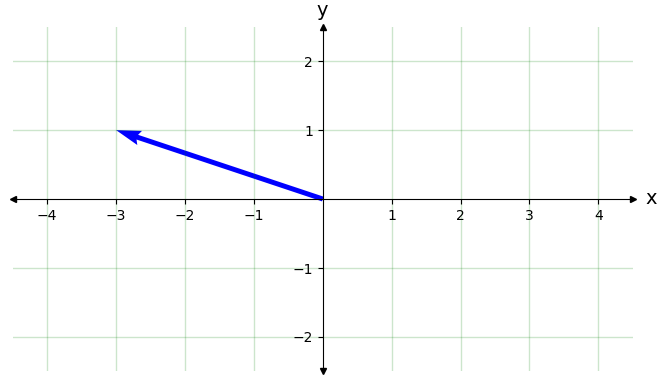

In [4]:
'''Forma cartesiana''' 
z = -3 + 1j

'''Extraemos las partes real e imaginaria'''
x=z.real
y=z.imag
print('z=x+iy=',x + 1j*y)

''' Representación en el plano complejo '''
'''esta función está en archivo: macro_CURSO.py  '''
''' Representación en el plano complejo '''
tQ.plot_2D_plane(left=-int(abs(x))-1,right=int(abs(x))+1,up=int(abs(y))+1,down=-int(abs(y))-1)
tQ.draw_vector(x,y,'b')


### Forma Polar

:::{card} 
**Teorema** $~$ *(fórmula de Euler)*

^^^

Dado un ángulo $\theta \in (0,2\pi)$ las dos expresiones siguientes son equivalentes

$$
\cos\theta + i \sin \theta = e^{i\theta} 
$$
:::

````{dropdown} Demostración
La demostración de la Fórmula de Euler viene de expandir ambos miembros en serie de Taylor en torno a $\theta = 0$ y comprobar que ambas series son iguales
```{math} 
\begin{array}{rcl}
e^{i\theta} &=& 1 + i\theta + \frac{1}{2}(i\theta)^2 + \frac{1}{3!}(i\theta)^3+\, ... \\ \rule{0mm}{6mm}
    &=& 1 -\frac{1}{2}\theta^2 ~+~ ... ~+~ i \left(\theta - \frac{1}{3!} \theta^3+ \, ...\right) \\ \rule{0mm}{6mm}
    &=& \cos \theta  + i \sin \theta 
\end{array}
```
````


```{math}
:label: label_align
       \begin{align}
        y    & =  ax^2 + bx + c \\
        f(x) & =  x^2 + 2xy + y^2 
        \end{align}
```

Un número complejo $z$ se puede representar también  en **forma polar**
<br> 

$$
z = \rho e^{i\theta} = \rho (\cos\theta + i \sin\theta)  
$$

Los números reales $\rho$ y $\theta$ se denominan *módulo* y *fase*.


Las fases $\theta$ y $\theta+ 2\pi$ representan el *mismo* número complejo
<br>

$$
z = \rho e^{i\theta} = \rho e^{i(\theta + 2\pi)} 
$$

y ello se debe a que las funciones $\cos \theta$ y $\sin\theta$ son periódicas

$$
\sin\theta  = \sin(\theta + 2\pi)~~~~~~~\cos\theta  = \cos(\theta +2\pi)
$$

:::{admonition} Ejemplo
:class: tip

Usar la forma polar es útil en situaciones en las que aparecen productos y potencias del número $i$

\begin{eqnarray}
i &=&  e^{i\pi/2} \\ \rule{0mm}{8mm}
-1 &=& i^2 = e^{i\pi} \\ \rule{0mm}{8mm}
i &=& e^{3i\pi/2} =e^{-i\pi/2} \\  \rule{0mm}{8mm}
i^i &=& (e^{i\pi/2})^i = e^{i^2 \pi/2} = e^{-\pi/2}  \\  \rule{0mm}{8mm}
i^{2+i} &=& (e^{i\pi/2})^{(2+i)}= e^{i\pi/2(2+i)} = e^{i\pi} e^{-\pi/2} = -e^{-\pi/2}  \rule{0mm}{8mm}
\end{eqnarray}
:::

### Conversión entre formas cartesiana y polar


La conversión de la representación *polar a cartesiana* es muy sencilla
gracias a las fórmula de Euler


<br>

$$
z = r e^{i\theta} = x + i y ~~~\hbox{ con }  ~~~\left\{\begin{array}{l} x=r \cos \theta \\ \rule{0mm}{4mm} y = r\sin \theta
\end{array} \right.
$$

<br>

La conversión inversa, *de cartesiana a polar* es un poco más delicada. Formalmente sería

<br>


$$
z = x + i y  = r e^{i\theta} ~~~ \hbox{ con } ~~~ \left\{\begin{array}{l} r=\sqrt{x^2+y^2} \\  \rule{0mm}{4mm} \theta = \arctan(y/x)
\end{array} \right.
$$


A la hora de la verdad hay que fijar el signo de la función $\arctan(y/x)$. La siguiente función examina esto mirando a los signos de $x$ y de $y$ para saber en qué cuadrante estamos.

In [5]:
'Conversión de Cartesianas a Polares'
def cartes2polar(z):

    y = z.imag
    x = z.real
    r = np.sqrt(x**2 + y**2)
    
    if r==0:
        print('el número 0+i0 no admite representación polar')
        th='indefinido'
    elif x==0 and y>0: 
        th=np.pi/2
    elif x==0 and y<0:
        th=3*np.pi/2
    elif x>0 and y>=0:
        th=np.arctan(y/x)
    elif x<0 and y>=0:
        th=np.arctan(-y/x)+np.pi/2
    elif x<0 and y<0:
        th=np.arctan(y/x)+np.pi
    elif x>0 and y<0:
         th=np.arctan(-y/x)+3*np.pi/2.       
            
    return np.round(r,3),np.round(th,3)

#el signo correcto también se puede conseguir usando la funcion np.arctan2(x,y)

In [6]:
'obtengamos la representación polar de z = 3+i'
r,th = cartes2polar(3.+1.j)
print('r=',r, ' th=', th)

'a la inversa no es necesario definir ninguna función, ya que numpy directamente escribe un numero complejo en forma cartesiana'
z = r*np.exp(1j*th)
print(np.round(z,2))


r= 3.162  th= 0.322
(3+1j)


### Conjugacion compleja
 
Todo número complejo, $z$, lleva *asociado* otro,  denominado el *complejo conjugado* $z^*$, que se obtiene cambiando $i \to -i$
<br>

$$
z = x+i y ~~~~\leftrightarrow~~~~ z^* = x - i y \hspace{2cm}
$$

La conjugación compleja es una *involución* $\Rightarrow (z^*)^* = z$ 

z = (3+1j)
z*= (3-1j)


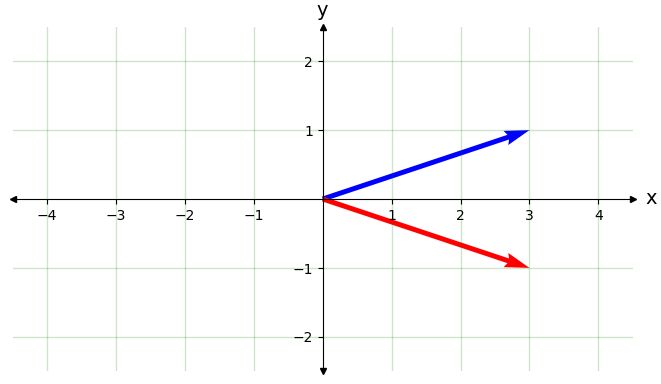

In [7]:
'''Conjugacion compleja'''
z = 3 + 1j
print('z =',z.real + 1j*z.imag)
zc = z.conjugate()
print('z*=',zc.real + 1j*zc.imag)

''' Representación en el plano complejo '''
tQ.plot_2D_plane(left=-int(abs(x))-1,right=int(abs(x))+1,up=int(abs(y))+1,down=-int(abs(y))-1)
tQ.draw_vector(z.real,z.imag,'b')
tQ.draw_vector(zc.real,zc.imag,vcolor='r')

 En forma polar la *conjugación compleja* se obtiene <u>*cambiando el signo*</u> de la fase
<br>

$$
z = \rho e^{i\theta} ~~\longrightarrow ~~z^* = \rho e^{-i\theta} = \rho \cos\theta - i \rho \sin\theta 
$$

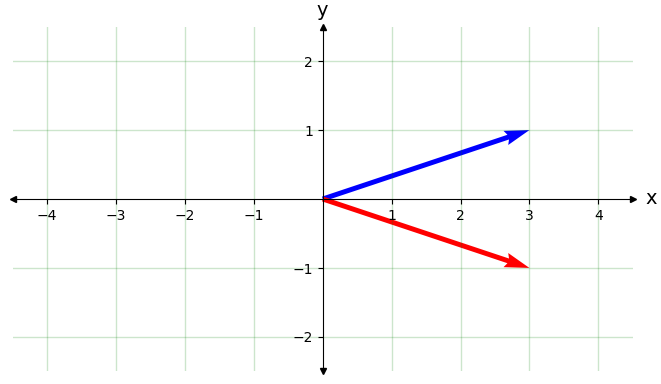

In [8]:
'''Forma polar'''
r=3.162
th=0.322
z = r*np.exp(th*1j)
zc = r*np.exp(-th*1j)

''' Dibujamos en el plano complejo '''
tQ.plot_2D_plane(left=-int(abs(x))-1,right=int(abs(x))+1,up=int(abs(y))+1,down=-int(abs(y))-1)
tQ.draw_vector(z.real,z.imag)
tQ.draw_vector(zc.real,zc.imag,vcolor='r')

##  Operaciones básicas


Los numeros complejos ${\mathbb C}$ forman una estructura matemática denominada *cuerpo*. Esto  quiere decir que admiten dos operaciones *internas*: la **suma** y la **multiplicación**. Vamos a estudiarlas por separado



### Suma

En representación *cartesiana* se *suman las partes real e imaginaria por separado*

<br>

$$
(a + i b) + (c + i d) = (a+c) + i (b+d)\hspace{6cm}
$$ 

<br>



La resta es obvia, ya que $a,b,c,d$ pueden ser números negativos. 


z1+z2= (3+6j)
z1-z2= (-1+2j)
************************************


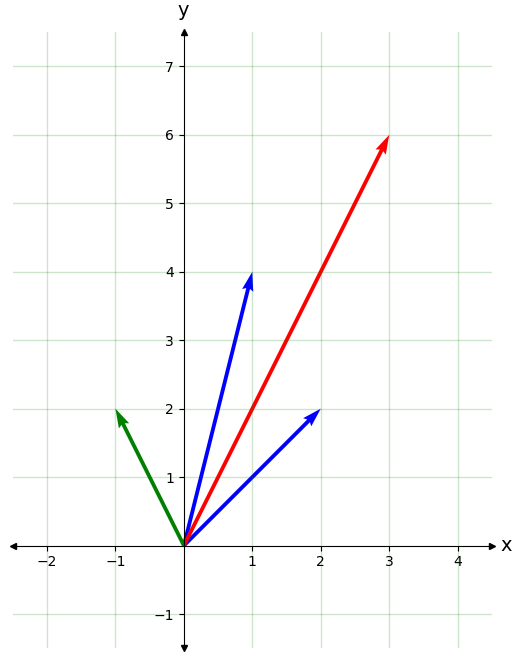

In [9]:
'''Suma en cartesianas'''

z1 = 1+4j
z2 = 2+2j

'''Suma y resta'''
zs = z1+z2
zd = z1-z2

print('z1+z2=',zs)
print('z1-z2=',zd)
print('************************************')



tQ.plot_2D_plane(left=-2,right=4,up=7,down=-1) #cambiar las dimensiones para que encuadrar la figura
tQ.draw_vector(z1.real,z1.imag,'b')
tQ.draw_vector(z2.real,z2.imag,'b')
' representamos la suma como un vector rojo'
tQ.draw_vector(zs.real,zs.imag,vcolor='r')
' representamos la resta como un vector verde'
tQ.draw_vector(zd.real,zd.imag,vcolor='g')


En *forma polar*, la suma de dos números complejos no admite ninguna simplificación, y deben transformarse primeramente a forma cartesiana, para sumarse. 

$$
z + w = \rho e^{i\theta} + \sigma e^{i\phi} = (\rho\cos\theta + \sigma\cos\phi) + i(\rho\sin\theta +  \sigma\sin\phi) \hspace{6cm}
$$

z1+z2= (3.3976+0.7941j)
z1-z2= (1.8679+2.0825j)
************************************


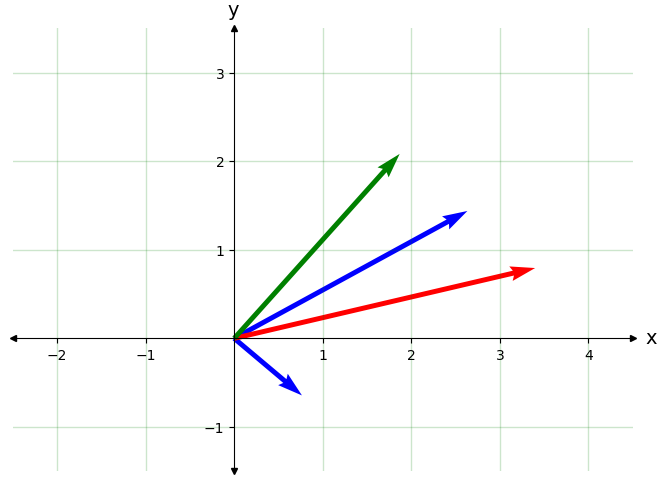

In [10]:
'python directamente escribe un numero complejo en forma cartesiana'
z1 = 3*np.exp(1j*0.5)
z2 = 1*np.exp(-1j*0.7)

'''Suma y resta'''
zs = z1+z2
zd = z1-z2

print('z1+z2=',np.round(zs,4))
print('z1-z2=',np.round(zd,4))
print('************************************')

tQ.plot_2D_plane(left=-2,right=4,up=3,down=-1) #cambiar las dimensiones para que encuadrar la figura
tQ.draw_vector(z1.real,z1.imag,'b')
tQ.draw_vector(z2.real,z2.imag,'b')
tQ.draw_vector(zs.real,zs.imag,vcolor='r')
tQ.draw_vector(zd.real,zd.imag,vcolor='g')


###  Multiplicación 



En *forma cartesiana* la multiplicación es complicada, debiendo multiplicarse todos los factores entre sí, y
teniendo en cuenta que $i^2= -1$

$$
(a + i b) (c + i d) =ac +  ai d +i bc +i^2 bd = (ab - bd) + i(ac + bd)
$$ 

Para hallar el producto de dos números complejos $z=r e^{i\theta}$ y $w=s e^{i\phi}$ escritos en forma polar, se multiplican los módulos y se suman las fases

$$
z w = r e^{i\theta} s e^{i\phi} = rs\,   e^{i(\theta + \phi)} 
$$

In [11]:
z1 = 3*np.exp(1j*0.5)
z2 = 1*np.exp(-1j*0.7)
'''Producto'''
print('z1*z2 = ', np.round(z1*z2,4))
print('z1**3 = ', np.round(pow(z1,6)))
print('************************************')

z1*z2 =  (2.9402-0.596j)
z1**3 =  (-722+103j)
************************************


### Valor absoluto

El cuadrado de un número real $a\in {\mathbb R}$ es otro número real positivo $a^2 >0$. Ello nos permite definir
el valor absoluto $|a| = \sqrt{a^2}$ que es el mismo para $a$ y para $-a$.

Esto no sucede con un número complejo $z$. En efecto,  

$$
z^2 = x^2 - y^2 +2i xy
$$ 

es complejo. Sin embargo, el producto de un número por su conjugado es un número *real* y *positivo*

$$
z z^*  = (x + i y) (x-i y) = x^2 + y^2 >0
$$


Ello nos permite definir el **valor absoluto** de un número complejo

$$
|z| = \sqrt{z z^*} = \sqrt{x^2 + y^2}
$$

El *valor absoluto* de un número complejo coincide con el *módulo*  de la forma polar

$$
|z| = \sqrt{zz^*} = \sqrt{\rho e^{i\theta} \rho e^{-i\theta}}=\sqrt{\rho^2} = \rho
$$



El *valor absoluto* de una fase es 1

$$
|e^{i\theta}| = \sqrt{ e^{i\theta}   e^{-i\theta}}=\sqrt{ e^{i(\theta-\theta)}}=\sqrt{e^0} = 1
$$


:::{admonition} Ejercicio
:class: tip

Verifica el valor absoluto de un producto de números complejos es el producto de sus valores absolutos
:::

### División


Al igual que la multiplicación, en forma cartesiana, la **división** no es simple. Sea $z = a+ i b$ y $w=c+i d$ 
<br>
<br>

$$
\frac{z}{w} = \frac{z}{w}\frac{w^*}{w^*} = \frac{( a+ i b)(c-i d)}{|w|^2} = \frac{ac+bd + i(bc-ad)}{c^2+d^2}  = \frac{ac+bd}{c^2+d^2} +i\frac{bc-ad}{c^2+d^2}
$$



En forma polar la división es tan sencilla como la multiplicación. Se toma el  cociente de los módulos y la resta de las fases

$$
\frac{z}{w} = \frac{|z| e^{i\theta}}{|w| e^{i\phi}} = \frac{|z|}{|w|}
e^{i(\theta-\phi)}
$$

In [12]:
'''Valor absoluto'''
print('abs(z1)=',abs(z1))
print('|z1|=',np.sqrt(z1*z1.conjugate()).real)
print('rho=',cartes2polar(z1)[0])
print('************************************')


'''Division'''
print('z1/z2=',np.round(z1/z2,5))
print('comprobación z1/z2=', np.round(z1*z2.conjugate()/(z2*z2.conjugate()),5))

abs(z1)= 3.0
|z1|= 3.0
rho= 3.0
************************************
z1/z2= (1.08707+2.79612j)
comprobación z1/z2= (1.08707+2.79612j)


##  Ejemplos y propiedades


### Sumas nulas

En <u>muchas ocasiones</u> nos encontraremos la siguiente representación del numero cero (complejo) $ 0 \equiv 0 + i 0$

$$
\sum_{k=0}^{N-1} e^{2\pi i k/N} =   e^{2\pi i\, 0/N} +  e^{2\pi i\, 1/N}  +~...~ +   e^{2\pi i\, (N-2)/N}+   e^{2\pi i\, (N-1)/N} ~=~  ~0
$$

Para convencerse de que esta identidad es cierta vamos a representar los números complejos y su suma. Puedes cambiar $N$ y también multiplicar por un módulo constante
 

In [13]:
# cambiar el número N
N=9
rho=1

''' Creamos las fases'''
lista_de_fases=np.exp(2*np.pi*1j*np.array(range(N))/N)
#print('lista de fases =', np.round(lista_de_fases,2))


''' Dibujamos los números complejos '''
tQ.plot_2D_plane(fsize=(6,6))
for vec in rho*lista_de_fases:
    tQ.draw_vector(x=vec.real,y=vec.imag)

#draw_unit_circle()
plt.gca().add_patch(plt.Circle((0.,0.),1.,color='black',fill=False)) 


In [14]:
''' Calculamos la suma. '''
#print(lista_de_fases)
print(np.round(sum(rho*lista_de_fases),10))


(-0+0j)


Sea  $j$ un número entero por el que <u>multiplicamos todas las fases</u>

- Si  con $1\leq j \leq N-1$ el resultado es el mismo

$$
\sum_{k=0}^{N-1} e^{2\pi i jk/N} =   e^{2\pi i\, j0/N} +  e^{2\pi i\, j/N}  +~...~ +   e^{2\pi i\, j(N-2)/N}+   e^{2\pi i\, j(N-1)/N} ~=~  ~0
$$


0j


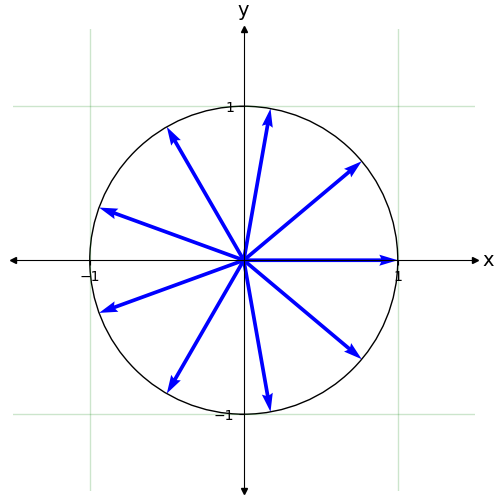

In [15]:
# cambiar el número N
N=9
rho=1
j=5
''' Creamos las fases'''
lista_de_fases=np.exp(2*j*np.pi*1j*np.array(range(N))/N)
#print('lista de fases =', np.round(lista_de_fases,2))


''' Dibujamos los números complejos '''
tQ.plot_2D_plane(fsize=(6,6))
for vec in rho*lista_de_fases:
    tQ.draw_vector(x=vec.real,y=vec.imag)

#draw_unit_circle()
plt.gca().add_patch(plt.Circle((0.,0.),1.,color='black',fill=False)) 

''' Calculamos la suma. '''
#print(lista_de_fases)
print(np.round(sum(rho*lista_de_fases),10))


- Sin embargo si $j = 0, N, 2N,... = 0\,\hbox{mod} N$, entonces la suma no se anula y su valor es igual a $N$. 

Tomemos por ejemplo $j=N$ 

$$
\sum_{k=0}^{N-1} e^{2\pi i (3N) k/N} = \sum_{k=0}^{N-1} e^{2\pi i  k}  =  \sum_{k=0}^{N-1} 1 =~  ~N
 $$


In [16]:
# cambiar el número N
N=9
rho=1
j=N
''' Creamos las fases'''
lista_de_fases=np.exp(2*j*np.pi*1j*np.array(range(N))/N)
#print('lista de fases =', np.round(lista_de_fases,2))


''' Dibujamos los números complejos '''
tQ.plot_2D_plane(fsize=(6,6))
for vec in rho*lista_de_fases:
    tQ.draw_vector(x=vec.real,y=vec.imag)

#draw_unit_circle()
plt.gca().add_patch(plt.Circle((0.,0.),1.,color='black',fill=False)) 

''' Calculamos la suma. '''
#print(lista_de_fases)
print(np.round(sum(rho*lista_de_fases),10))


(9-0j)


Una manera de resumir todos los casos anteriores en una sola expresión involucra la función  **Delta  de Kronecker**: $\delta_{ij}$

$$
\delta_{ij} = \left\{ \begin{array}{rcl} 0 & \hbox{si} & i\neq 0 \\ 1 & \hbox{si} & i = j \end{array} \right.
$$

Con ella podemos enunciar el siguiente resultado 

:::{card} 
**Teorema**

^^^

$$
\frac{1}{N}\sum_{k=0}^{N-1} e^{2\pi i \, j k/N} =  \delta_{j\, 0{\rm mod} N}
$$

:::

- Es decir, la suma es sólo 1 si $j = 0$mod N.

- Esta expresión es de uso muy frecuente en algortimia pues refleja la interferencia destructiva de las superposiciones cuánticas.


### Desigualdad triangular


El módulo de la suma de dos números complejos verifica que

$$
| z+w| \leq |z| + |w| 
$$

Donde la igualdad sólo se verifica cuando ambos números complejos son paralelos en el plano complejo. 

|z1|+|z2|= 4.919349550499537
|z1+z2|= 4.8645696489522345


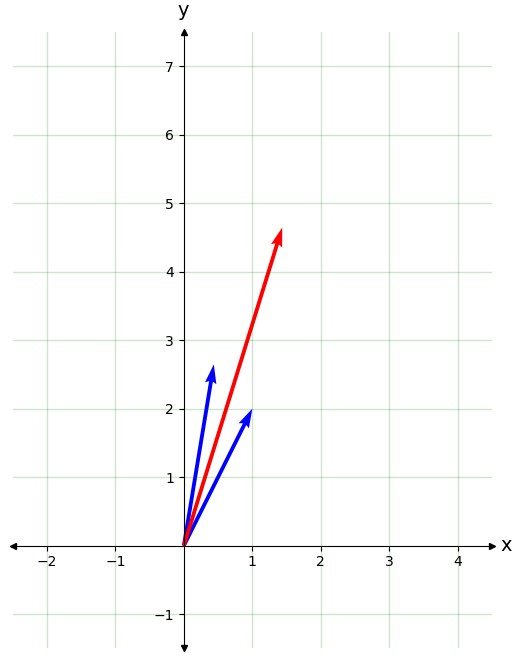

In [17]:
'''Comprueba que sólo cuando z1 y z2 son paralelos, se satura la desigualdad triangular'''

'''Suma en cartesianas'''
z1 = 1+2j

ang = 0.3 #el ángulo entre z1 y z2
z2 = z1*(1.2*np.exp(1j*ang))

'''Suma '''
zs = z1+z2

print('|z1|+|z2|=',abs(z1)+abs(z2))
print('|z1+z2|=',abs(z1+z2))


tQ.plot_2D_plane(left=-2,right=4,up=7,down=-1) #cambiar las dimensiones para que encuadrar la figura
tQ.draw_vector(z1.real,z1.imag,'b')
tQ.draw_vector(z2.real,z2.imag,'b')
tQ.draw_vector(zs.real,zs.imag,vcolor='r')